# Preparando os dados

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')

X_train_norm = X_train_norm / 255.0
X_test_norm = X_test_norm / 255.0

In [ ]:
X_train_norm[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

# Treinamento e teste da CNN

In [ ]:
model = keras.Sequential()

# 1
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

# 2
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Preencher com zeros
model.add(keras.layers.Flatten())

# Deep MLP
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [ ]:
model.compile(optimizer= keras.optimizers.SGD(lr=0.001, momentum=0.9), # Stochastic gradient descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train_norm, y_train, epochs=600, 
                 validation_data=(X_test_norm, y_test), 
                 callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10))

Epoch 1/600
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0207 - accuracy: 0.2585 - val_loss: 1.7104 - val_accuracy: 0.3953
Epoch 2/600
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6407 - accuracy: 0.4060 - val_loss: 1.4800 - val_accuracy: 0.4612
Epoch 3/600
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4529 - accuracy: 0.4746 - val_loss: 1.3465 - val_accuracy: 0.5220
Epoch 4/600
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3283 - accuracy: 0.5225 - val_loss: 1.2377 - val_accuracy: 0.5639
Epoch 5/600
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2295 - accuracy: 0.5631 - val_loss: 1.1533 - val_accuracy: 0.5893
Epoch 6/600
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1499 - accuracy: 0.5927 - val_loss: 1.1610 - val_accuracy: 0.5962
Epoch 7/600
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0814 - accuracy: 0.6205 - val_loss: 1.0604 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test_norm,  y_test, verbose=2)

313/313 - 1s - loss: 0.9740 - accuracy: 0.7242


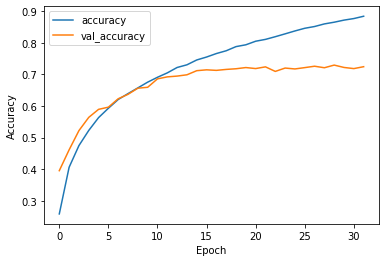

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test_norm)
predictions

array([[6.7385486e-07, 1.1224833e-05, 1.9333385e-07, ..., 3.8181951e-09,
        3.3783817e-04, 1.8330782e-06],
       [6.9675315e-03, 7.2028994e-04, 1.0376690e-08, ..., 5.4364331e-13,
        9.9230051e-01, 1.1650588e-05],
       [2.2181408e-02, 3.1073535e-02, 8.4238558e-04, ..., 3.4363297e-06,
        9.2956144e-01, 1.6178893e-02],
       ...,
       [7.5677326e-07, 6.8427988e-09, 6.9465092e-04, ..., 1.7134823e-03,
        1.4049720e-09, 1.1245047e-08],
       [4.0777834e-04, 9.9917054e-01, 5.5317412e-07, ..., 2.0176472e-05,
        2.1020837e-08, 2.2925711e-05],
       [2.9700114e-11, 5.5140484e-13, 3.4810334e-08, ..., 9.2680526e-01,
        2.2215067e-14, 1.3570207e-12]], dtype=float32)

In [ ]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))

In [ ]:
mat = tf.math.confusion_matrix(y_test, predictions_)
mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[777,  15,  41,  17,  23,   1,  13,   6,  69,  38],
       [ 19, 823,   4,   7,   5,   7,  11,   3,  33,  88],
       [ 62,   5, 557,  74, 108,  59,  69,  35,  21,  10],
       [ 28,   7,  57, 559,  61, 151,  56,  36,  30,  15],
       [ 22,   5,  53,  50, 701,  39,  36,  68,  20,   6],
       [ 10,   3,  43, 199,  44, 614,  20,  46,  16,   5],
       [ 12,   1,  37,  75,  41,  20, 787,   3,  14,  10],
       [ 17,   4,  25,  38,  78,  59,   7, 751,   6,  15],
       [ 56,  15,  10,  11,   5,   6,   4,   4, 863,  26],
       [ 35,  72,   8,  18,   5,   5,   6,  12,  29, 810]], dtype=int32)>

Text(91.68, 0.5, 'predicted label')

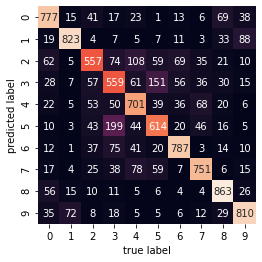

In [ ]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')